### Crawl a page with requests and parse it with Beautiful Soup
https://nathanaelvictorious.medium.com/simple-web-scraping-using-beautifulsoup-and-python-in-google-colab-4084be701851

In [2]:
# Import requests for crawling a page and Beautiful Soup for parse the HTML content
# Import other libraries for demonstration
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Fetch a website URL and store it to webpage
webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")

#Take the webpage variable and fetch the content using BeautifulSoup
soup = BeautifulSoup(webpage.content, "html.parser")

In [12]:
soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<style>
         #cacaoTable {
         border-collapse: collapse;
         border: 2px black solid;
         font: 12px sans-serif;
         }
         #cacaoTable td {
         border: 1px black solid;
         padding: 5px;
         }
         #infoContainer {
         margin-bottom: 10px;
         display: inline-block;
         margin-right: 10px;
         }
         #chocolate {
         width: 300px;
         }
         #picContainer {
         display: inline;
         }
      </style>
</head>
<body>
<!-- <script src="http://d3js.org/d3.v3.min.js"></script> -->
<div id="banner">
<h1>Cacao Ratings</h1>
</div>
<div id="infoContainer">
<table class="infoTable">
<tr>
<td>Compiled ratings of over 1700 Chocolate bars</td>
</tr>
<tr>
<td>Ratings are from 1-5</td>
</tr>
</table>
</div>
<div id="picContainer">
<img id="chocolate" src="chocolate.jpg"/>
</div>
<table id="cacaoTable">
<tr>
<td class="Company">Company 
       

In [4]:
# Store the whole text in HTML that have the class "Rating" and "CocoaPercent"
rating_column = soup.find_all(attrs={"class": "Rating"})
cocoa_percent_tags = soup.find_all(attrs={"class": "CocoaPercent"})

In [5]:
# Make a empty lists for Rating and CocoaPercent
ratings = []
cocoa_percents = []

# Loop for inserting each table data to list
for x in rating_column[1:] :
  ratings.append(float(x.get_text()))

for td in cocoa_percent_tags[1:] :
  percent = float(td.get_text().strip('%'))
  cocoa_percents.append(percent)

# Combining both ratings and cocoa_percents list to a dictionary
data = {"Rating": ratings, "CocoaPercentage": cocoa_percents}

# Make a new Data Frame from data dictionary
df = pd.DataFrame.from_dict(data)


In [6]:
df 

,Rating,CocoaPercentage
0,3.75,63.0
1,2.75,70.0
2,3.00,70.0
3,3.50,70.0
4,3.50,70.0
...,...,...
1790,3.75,70.0
1791,3.00,65.0
1792,3.50,65.0
1793,3.25,62.0


In [7]:
# Find the fits using polyfit
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)

# Make the line polynomial function using poly1d
line_function = np.poly1d(z)


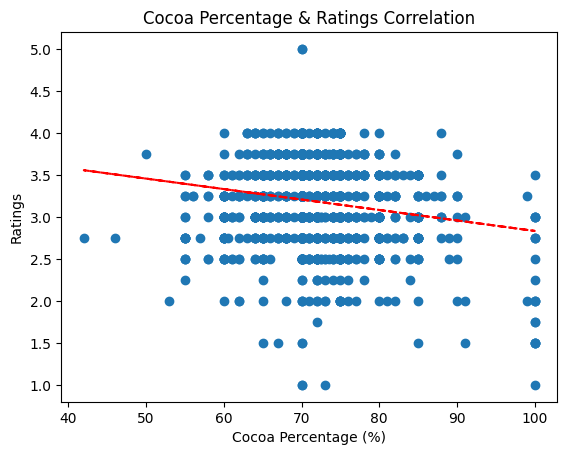

In [8]:
# Plotting the data
plt.scatter(df.CocoaPercentage, df.Rating)
plt.title('Cocoa Percentage & Ratings Correlation')
plt.xlabel('Cocoa Percentage (%)')
plt.ylabel('Ratings')
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.show()